In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pickle

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

c:\users\xrisa\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['Cmp', 'Sup', '_'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


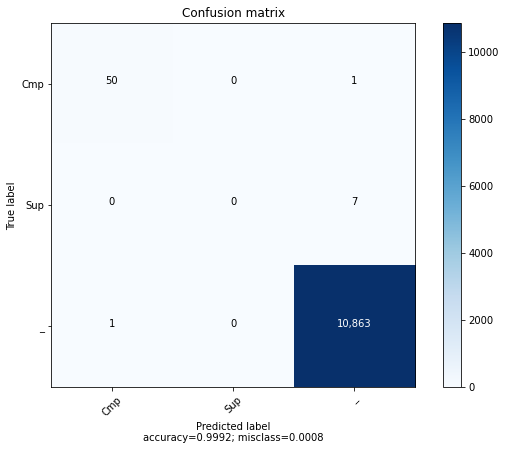

In [22]:
worst_feats = ['Degree', 'Mood', 'Foreign']

sentences = pickle.load(open('sentences.pickle', "rb"))
feat_to_I2L = pickle.load(open('ud_features_I2L.pickle', "rb"))

def read_by_feat(f_i=1):
    tables = []
    y_true=[]
    y_pred=[]
    for sen in sentences:
        sentence = sen[0]
        words = sen[1]
        
        feat = sen[f_i]
        I2L = feat_to_I2L[worst_feats[f_i-2]]
        #0:targets
        #1:predictions
        targets = feat[0]
        preds = feat[1]
        y_true.extend(targets)
        y_pred.extend(preds)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred, I2L),I2L,normalize=False)
read_by_feat(2)

c:\users\xrisa\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['Ind', '_', 'Imp'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


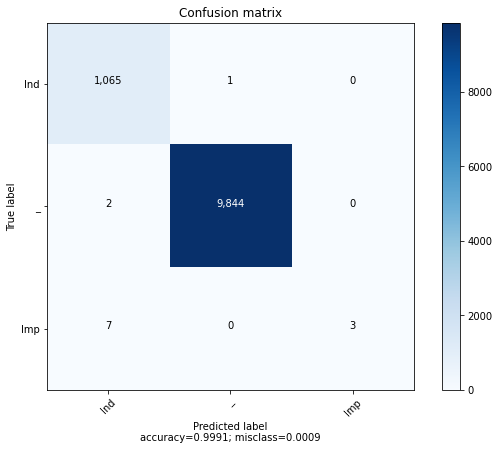

In [23]:
read_by_feat(3)

c:\users\xrisa\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['_', 'Yes'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


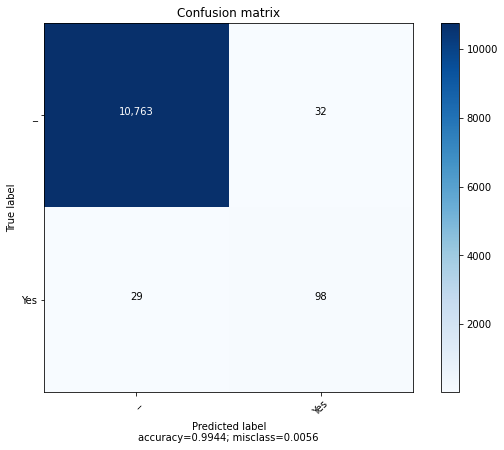

In [24]:
read_by_feat(4)